# <font color='navy'> <b> STEMFIE-X Example - Small Crane </b></font>

<img src="./img/demo/banner_02.png" width="800">

Simple crane with manual control. A tool for understanding the function of double pulley.

<img src="./img/examples/crane_01.jpg" width="800">

## <font color='teal'> <b> Components </b></font>

All STEP files needed to 3D print and build the model are in the directory **./notebook/model/step_01_crane/**. If you want to modify the model, adjust the size and type of components used, you can modify the following code.

### <font color='purple'> <b> Standard library components </b></font>

In [38]:
from lib import *

b14 = Brace(5);                 b14.export_step('./model/step_01_crane/brace_B_05')         # 12 pcs
b15 = Brace(2,1);               b15.export_step('./model/step_01_crane/brace_B_02_10')      #  9 pcs
b17 = Brace(4);                 b17.export_step('./model/step_01_crane/brace_B_04')         #  2 pcs
b20 = Brace(4,1);               b20.export_step('./model/step_01_crane/brace_B_04_10')      #  1 pcs  
b21 = Brace(2,3/4);             b21.export_step('./model/step_01_crane/brace_B_02_34')      #  2 pcs 
b22 = Brace(12);                b22.export_step('./model/step_01_crane/brace_B_12')         #  2 pcs
b23 = Brace(3);                 b23.export_step('./model/step_01_crane/brace_B_03')         #  1 pcs
b24 = Brace(1);                 b24.export_step('./model/step_01_crane/brace_B_01')         #  2 pcs

b16 = Beam_U_Block(10,5, 1/4, 1/2);  b16.export_step('./model/step_01_crane/block_U_10_05')      #  2 pcs
b18 = Beam_U_Block(5,5, 1/4, 1/2);   b18.export_step('./model/step_01_crane/block_U_05_05')      #  2 pcs

p1 = Pulley(1,1/2);             p1.export_step('./model/step_01_crane/pull_A_12')           #  4 pcs
c1 = BU_Cylinder(1,1);          c1.export_step('./model/step_01_crane/base_C_01_01')        #  8 pcs
c2 = BU_Cylinder(1,2);          c2.export_step('./model/step_01_crane/base_C_01_02')        #  1 pcs
w2 = Wheel(1, 1/4, 1+1/4);      w2.export_step('./model/step_01_crane/wheel_A_14_54')       #  1 pcs
w3 = Wheel(2, 1/2, 1/2);        w3.export_step('./model/step_01_crane/wheel_B_12_12')       #  1 pcs


### <font color='purple'> <b> Extended components </b></font>

Extended components are obtained by modifying and assembling them from standard components.

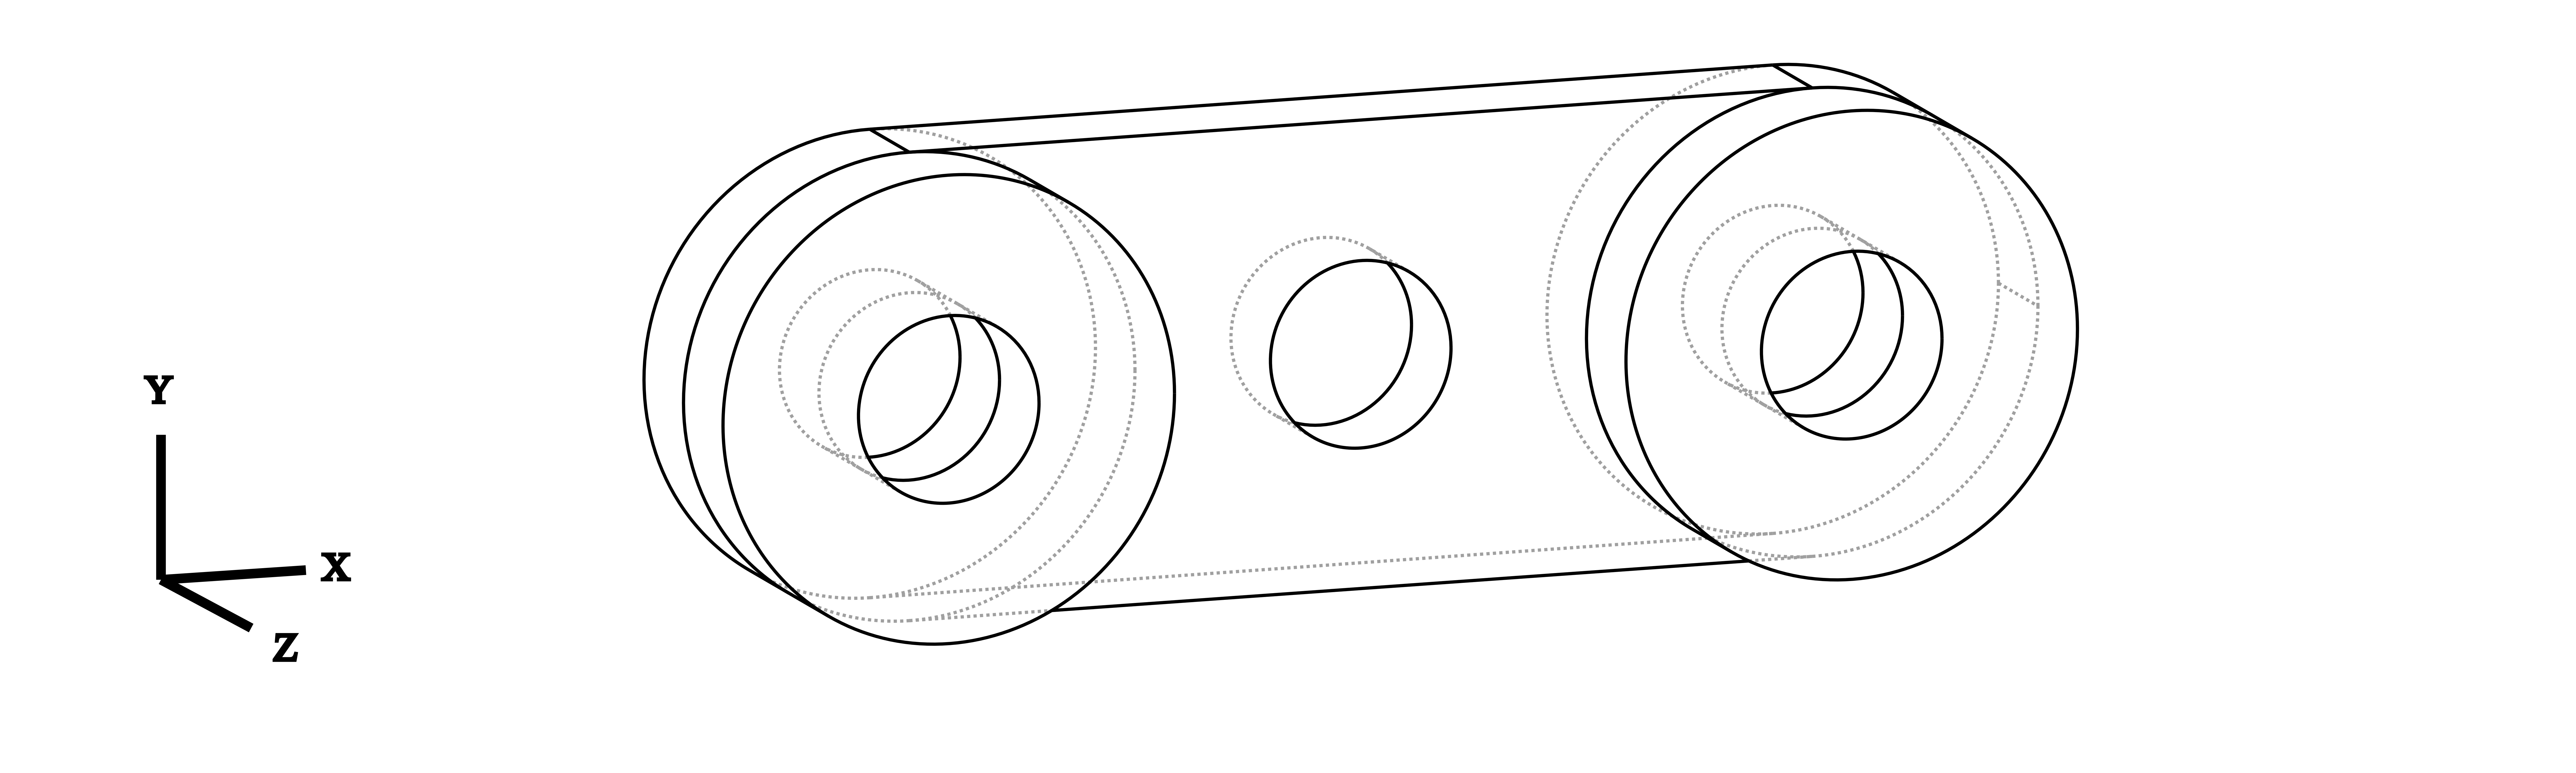

In [35]:
class Brace_16_14_06_05(Stemfie_X):
    def __init__(self):        
        b1 = Brace(16, holes=True)
        h1 = Hole_Slot(2, 1/2+1/4).BU_Tx(1)
        h2 = Hole_Slot(2, 1/2+1/4).BU_Tx(4)
        h3 = Hole_Slot(2, 1/2+1/4).BU_Tx(7)
        h4 = Hole_Slot(2, 1/2+1/4).BU_Tx(10)
        h5 = Hole_Slot(2, 1/2+1/4).BU_Tx(13)
        b1.D([h1, h2, h3, h4, h5] )
        self.obj = b1.obj
        
class Comp_Hook_Block(Stemfie_X):
    def __init__(self,n):        
        b1 = Brace(n, holes=True)
        b2 = Brace(1, 1/2, holes=True)
        b3 = Brace(1, 1/2, holes=True).BU_Tx(n-1)
        b1.U([b2, b3] )
        self.obj = b1.obj

class Comp_Hook(Stemfie_X):
    def __init__(self):        
        b1 = Brace(2, holes=True)
        q1 = BU_Cube([1/3,1,1]).BU_Txy(0,1/4).Rz(-45).BU_Txy(1/8,1/8)
        b1.D(q1 )
        self.obj = b1.obj

b11 = Brace_16_14_06_05();      b11.export_step('./model/step_01_crane/brace_B_16_14_06_05')   # 4 pcs
x01 = Comp_Hook_Block(3);       x01.export_step('./model/step_01_crane/comp_C_hook_block_03')  # 2 pcs
x02 = Comp_Hook_Block(4);       x02.export_step('./model/step_01_crane/comp_C_hook_block_04')  # 2 pcs
x03 = Comp_Hook();              x03.export_step('./model/step_01_crane/comp_C_hook_block_02')  # 1 pcs

Image(convert_to_image(x01,'./img/comp_C_hook_block_03'), width=200)

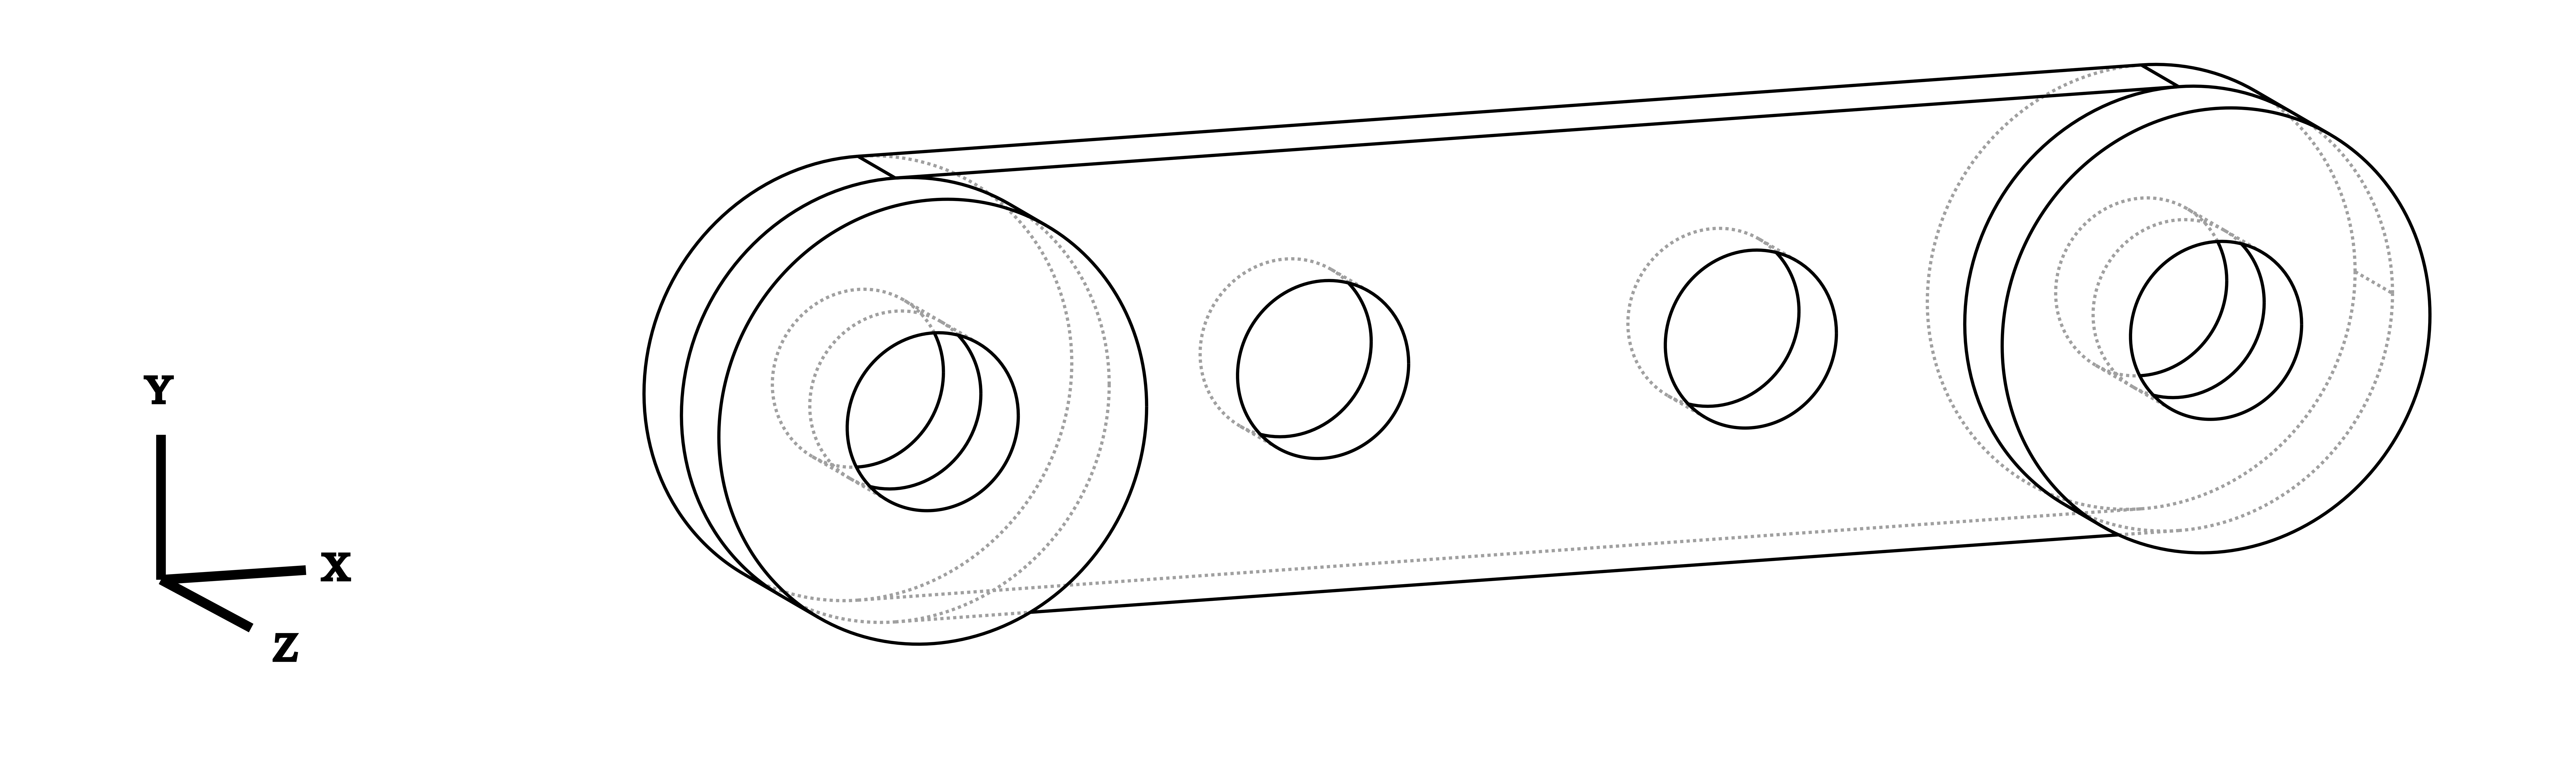

In [3]:
Image(convert_to_image(x02,'./img/comp_C_hook_block_04'), width=200)

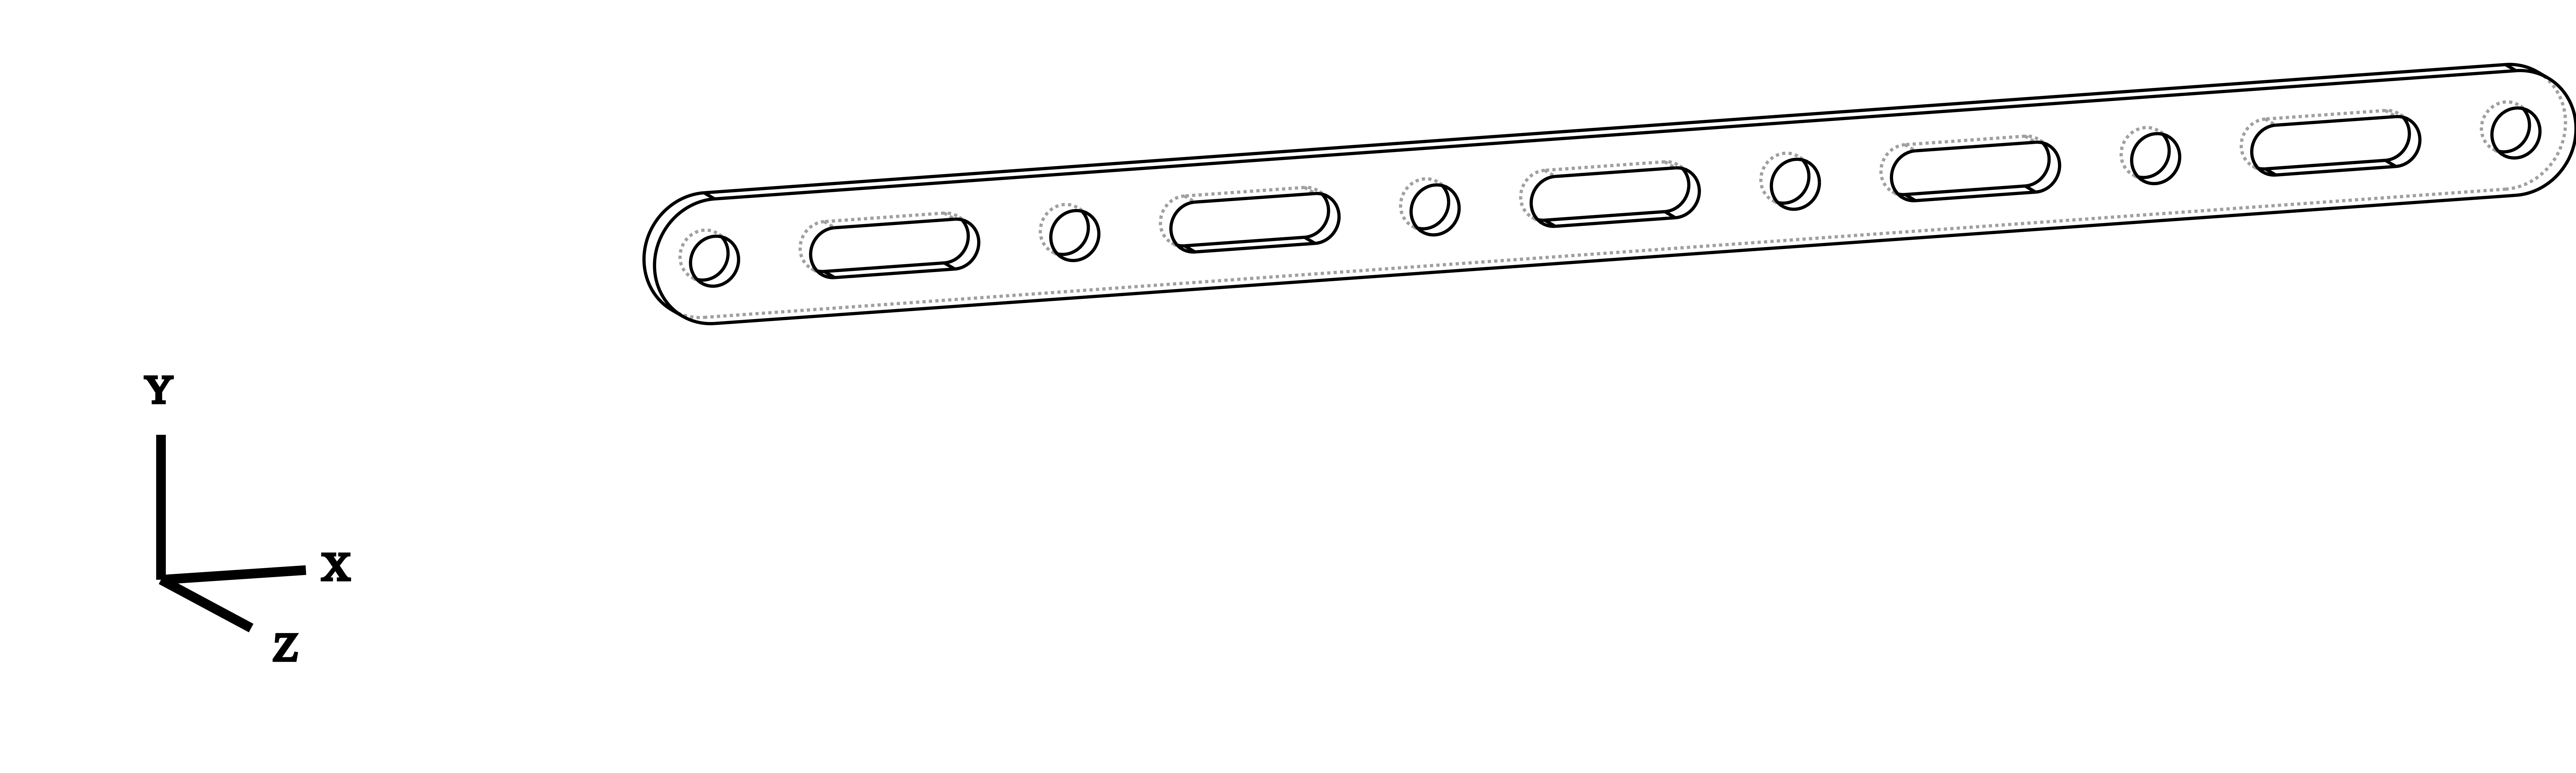

In [4]:
Image(convert_to_image(b11,'./img/brace_B_16_14_06_05'), width=800)

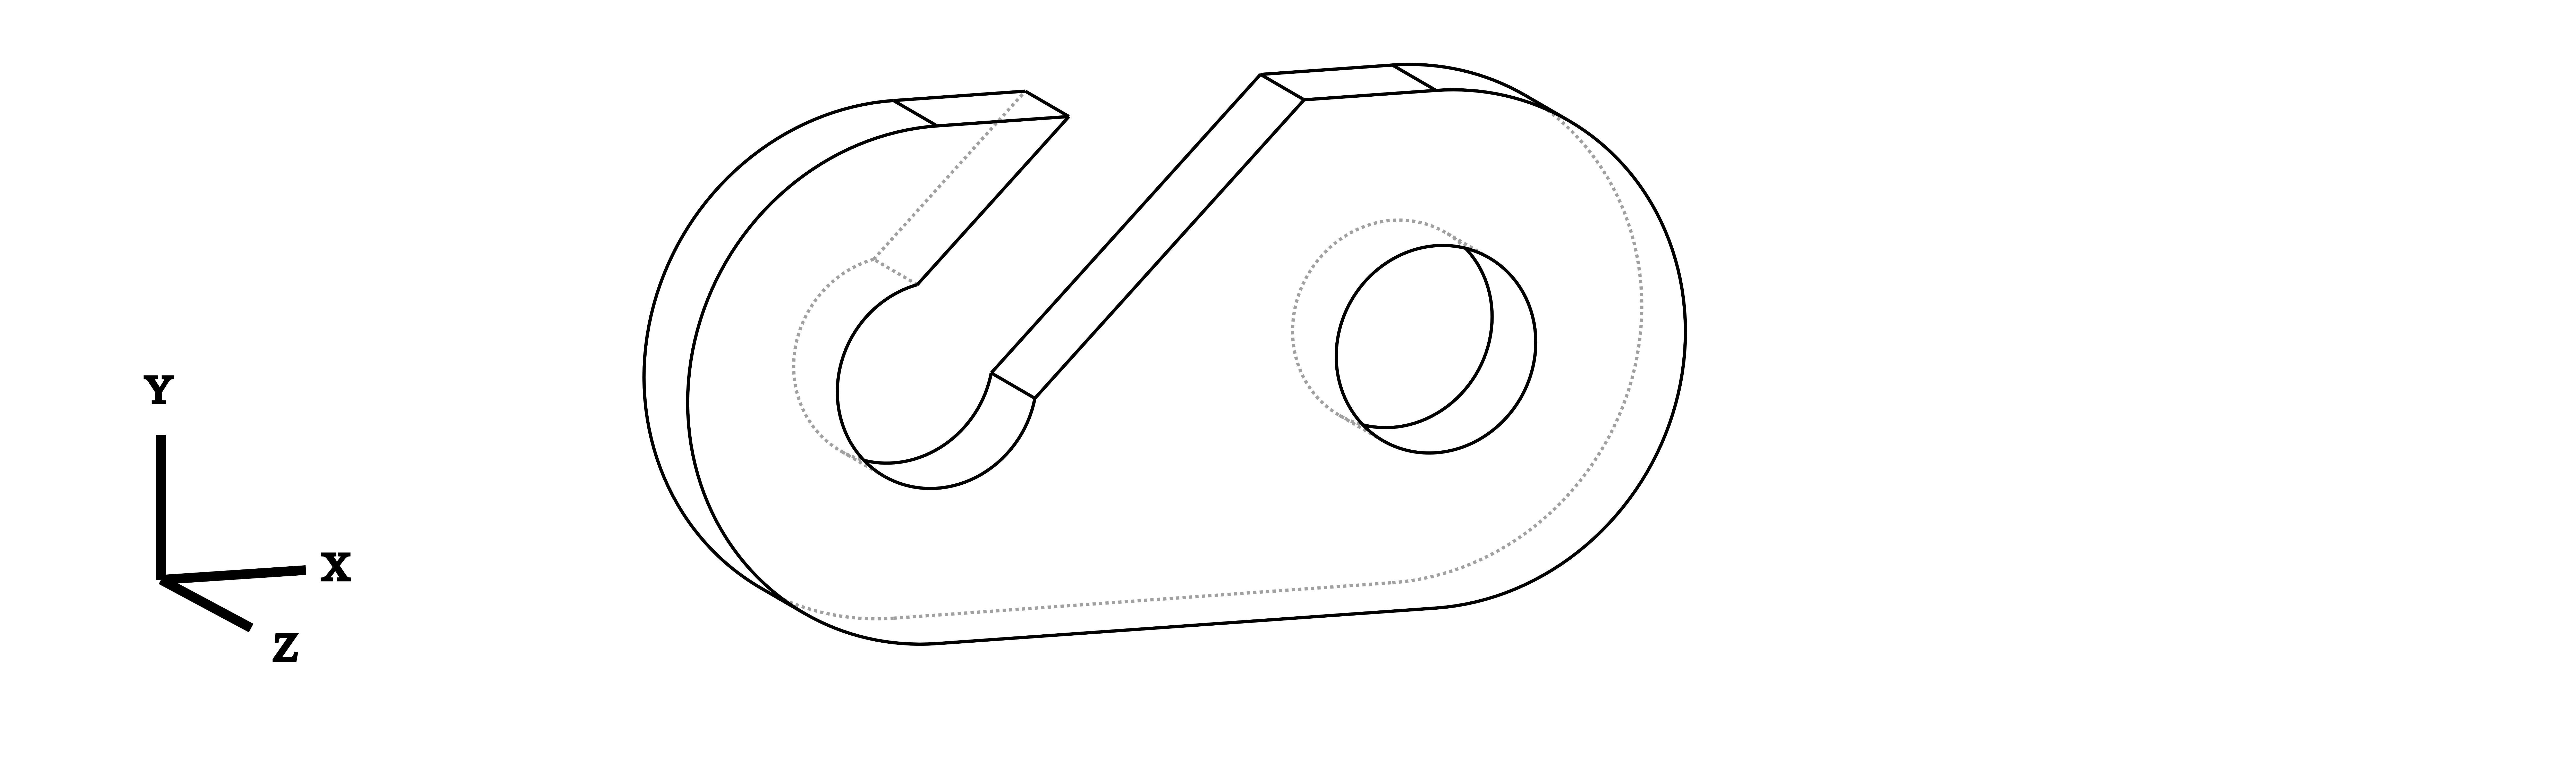

In [36]:
Image(convert_to_image(x03,'./img/comp_C_hook_block_02'), width=400)

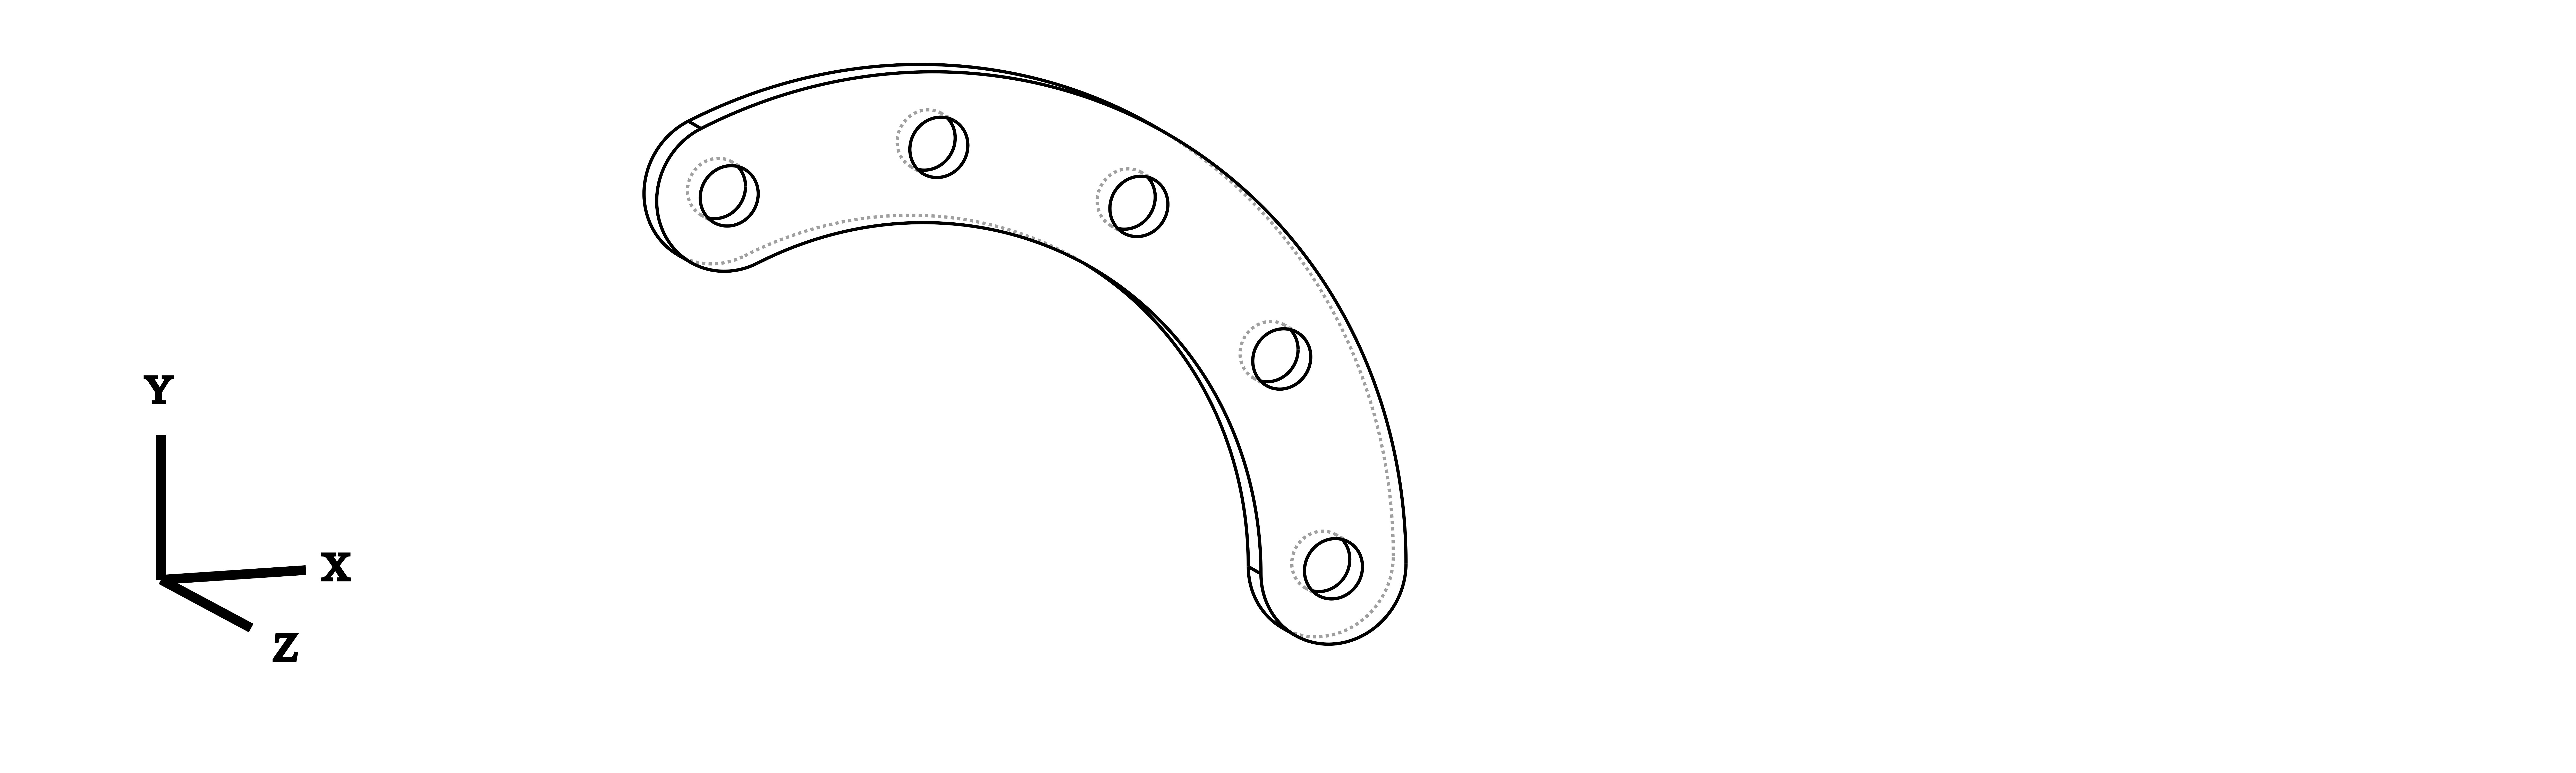

In [1]:
from lib import *
from numpy import arcsin, pi

D = 6   # D >= 2*R+1  
R = 3   # arc radius

alpha = arcsin( (D-1) / (2*R ) )
beta = 2*alpha
H = R*cos(alpha)
bdeg = beta/pi*180     # convert rad -> deg
h = R*cos(alpha)
br1 = Brace_Arc(R, bdeg, 1/4, 5, center=True);  br1.export_step('./model/step_01_crane/brace_A_03_14_06_112')  # 1 pcs
Image(convert_to_image(br1,'./img/brace_A_03_14_06_112'), width=400)

## <font color='teal'> <b> Construction </b></font>

### <font color='purple'> <b> Crane arm, hoist and rope winch. </b></font>

<img src="./img/examples/crane_05.jpg" width="400">
<img src="./img/examples/crane_04.jpg" width="400">
<img src="./img/examples/crane_02.jpg" width="400">
<img src="./img/examples/crane_03.jpg" width="400">

### <font color='purple'> <b> Hook block </b></font>

<img src="./img/examples/crane_img_03.png" width="400">
<img src="./img/examples/crane_img_04.png" width="400">

<img src="./img/demo/banner_02.png" width="800">